# Modeling:
* Try modeing wth LASSO

## Import packages

In [4]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn import preprocessing, svm
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error

#Use to ignore convergence warnings
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import __version__ as sklearn_version
import datetime

import joblib

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FitFailedWarning)


# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
# np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

## Load X and y data sets

In [5]:
# import X and y training and test sets

X = pd.read_csv('../../data/train_test/X_alt')
y = pd.read_csv('../../data/train_test/y_alt')

X_train = pd.read_csv('../../data/train_test/X_train_74_26')

X_test = pd.read_csv('../../data/train_test/X_test_74_26')

y_train = pd.read_csv('../../data/train_test/y_train_alt_74_26')

y_test = pd.read_csv('../../data/train_test/y_test_alt+74_26')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)

In [10]:
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(random_state=42))])
lasso_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('lasso', Lasso(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'lasso': Lasso(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 42,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [16]:
tf = [True, False]
lasso_param_grid = {
    'scaler':[None, StandardScaler()],
    # 'scaler__with_mean': tf,
    # 'scaler__with_std': tf,
    'lasso__copy_X': tf,
    'lasso__fit_intercept': tf,
    'lasso__normalize': tf,
    'lasso__positive': tf,
    'lasso__selection':['random','cyclic'],
    'lasso__warm_start': tf
}

In [17]:
lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, n_jobs=-1)
lasso_grid.fit(X_train, y_train)
lasso_grid.best_score_, lasso_grid.best_params_

(0.22294389277542132,
 {'lasso__copy_X': True,
  'lasso__fit_intercept': True,
  'lasso__normalize': False,
  'lasso__positive': False,
  'lasso__selection': 'random',
  'lasso__warm_start': True,
  'scaler': StandardScaler()})

In [19]:
lasso_param_grid_2 = {
    'scaler__with_mean': tf,
    'scaler__with_std': tf,
    'lasso__copy_X': tf,
    'lasso__fit_intercept': tf,
    'lasso__normalize': tf,
    'lasso__positive': tf,
    'lasso__selection':['random','cyclic'],
    'lasso__warm_start': tf
}

In [29]:
lasso_grid_2 = GridSearchCV(lasso_pipe, lasso_param_grid_2, cv=5, n_jobs=-1)
lasso_grid_2.fit(X_train, y_train)
lasso_grid_2.best_score_, lasso_grid_2.best_params_

(0.22294389277542132,
 {'lasso__copy_X': True,
  'lasso__fit_intercept': True,
  'lasso__normalize': False,
  'lasso__positive': False,
  'lasso__selection': 'random',
  'lasso__warm_start': True,
  'scaler__with_mean': True,
  'scaler__with_std': True})

In [27]:
alpha = np.logspace(start=0, stop=1, num=20)
alpha

array([ 1.        ,  1.12883789,  1.27427499,  1.43844989,  1.62377674,
        1.83298071,  2.06913808,  2.33572147,  2.6366509 ,  2.97635144,
        3.35981829,  3.79269019,  4.2813324 ,  4.83293024,  5.45559478,
        6.15848211,  6.95192796,  7.8475997 ,  8.8586679 , 10.        ])

In [35]:
lasso_param_grid_3 = {
    # 'lasso__copy_X': [True],
    # 'lasso__fit_intercept': [True],
    # 'lasso__normalize': [False],
    # 'lasso__positive': [False],
    # 'lasso__selection':['random'],
    # 'lasso__warm_start': [True],
    'lasso__alpha': alpha,
    'lasso__copy_X': tf,
    'lasso__fit_intercept': tf,
    'lasso__normalize': tf,
    'lasso__positive': tf,
    'lasso__selection':['random','cyclic'],
    'lasso__warm_start': tf

}

In [36]:
lasso_grid_3 = GridSearchCV(lasso_pipe, lasso_param_grid_3, cv=5, n_jobs=-1)
lasso_grid_3.fit(X_train, y_train)
lasso_grid_3.best_score_, lasso_grid_3.best_params_


(0.22294389277542132,
 {'lasso__alpha': 1.0,
  'lasso__copy_X': True,
  'lasso__fit_intercept': True,
  'lasso__normalize': False,
  'lasso__positive': False,
  'lasso__selection': 'random',
  'lasso__warm_start': True})

In [59]:
# graph alpha
lasso_mean_score = lasso_grid_3.cv_results_['mean_test_score']
lasso_std_score = lasso_grid_3.cv_results_['std_test_score']
alpha_vals = [alph for alph in lasso_grid_3.cv_results_['param_lasso__alpha']]
alpha_best = lasso_grid_3.best_params_['lasso__alpha']

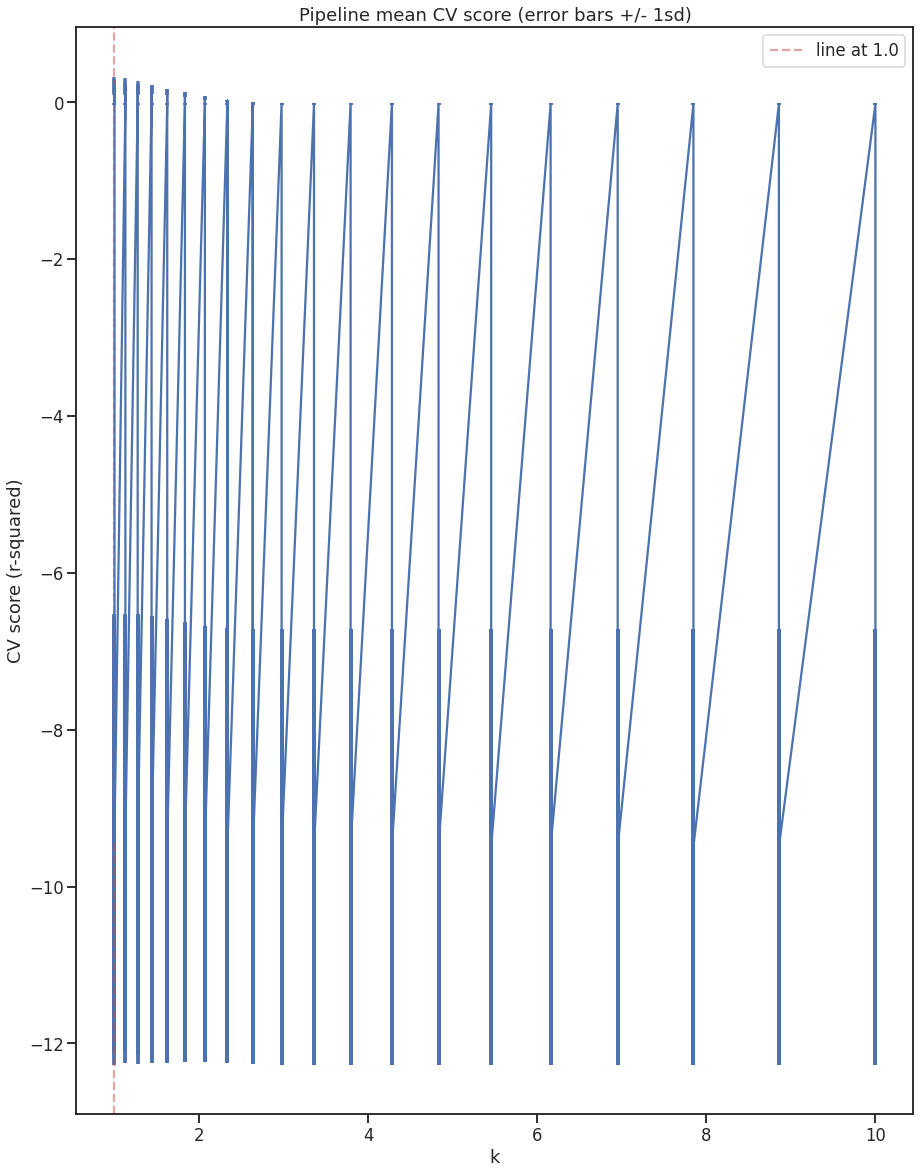

In [60]:
plt.figure(figsize=(15,20))
plt.errorbar(alpha_vals, lasso_mean_score, yerr=lasso_std_score)
plt.axvline(x=alpha_best, c='r', ls='--', alpha=.5, label='line at {}'.format(alpha_best))
# plt.xticks(np.arange(0,1300, step=50))
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)')
plt.legend();

In [62]:
alpha = [n for n in np.logspace(start=-1, stop=0, num=20)]
alpha

[0.1,
 0.11288378916846889,
 0.12742749857031338,
 0.14384498882876628,
 0.16237767391887217,
 0.18329807108324356,
 0.20691380811147897,
 0.23357214690901226,
 0.26366508987303583,
 0.29763514416313175,
 0.33598182862837817,
 0.37926901907322497,
 0.42813323987193935,
 0.4832930238571752,
 0.5455594781168519,
 0.6158482110660264,
 0.6951927961775606,
 0.7847599703514611,
 0.8858667904100825,
 1.0]

In [68]:
lasso_param_grid_4 = {
    # 'lasso__copy_X': [True],
    # 'lasso__fit_intercept': [True],
    # 'lasso__normalize': [False],
    # 'lasso__positive': [False],
    # 'lasso__selection':['random'],
    # 'lasso__warm_start': [True],
    'lasso__alpha': alpha,
    'lasso__copy_X': tf,
    'lasso__fit_intercept': tf,
    'lasso__normalize': tf,
    'lasso__positive': tf,
    'lasso__selection':['random','cyclic'],
    'lasso__warm_start': tf
}

In [69]:
lasso_grid_4 = GridSearchCV(lasso_pipe, lasso_param_grid_4, cv=5, n_jobs=-1)
lasso_grid_4.fit(X_train, y_train)
lasso_grid_4.best_score_, lasso_grid_4.best_params_

(0.24066964087260256,
 {'lasso__alpha': 0.5455594781168519,
  'lasso__copy_X': True,
  'lasso__fit_intercept': True,
  'lasso__normalize': False,
  'lasso__positive': True,
  'lasso__selection': 'cyclic',
  'lasso__warm_start': True})

In [70]:
# graph alpha
lasso_mean_score = lasso_grid_4.cv_results_['mean_test_score']
lasso_std_score = lasso_grid_4.cv_results_['std_test_score']
alpha_vals = [alph for alph in lasso_grid_4.cv_results_['param_lasso__alpha']]
alpha_best = lasso_grid_4.best_params_['lasso__alpha']

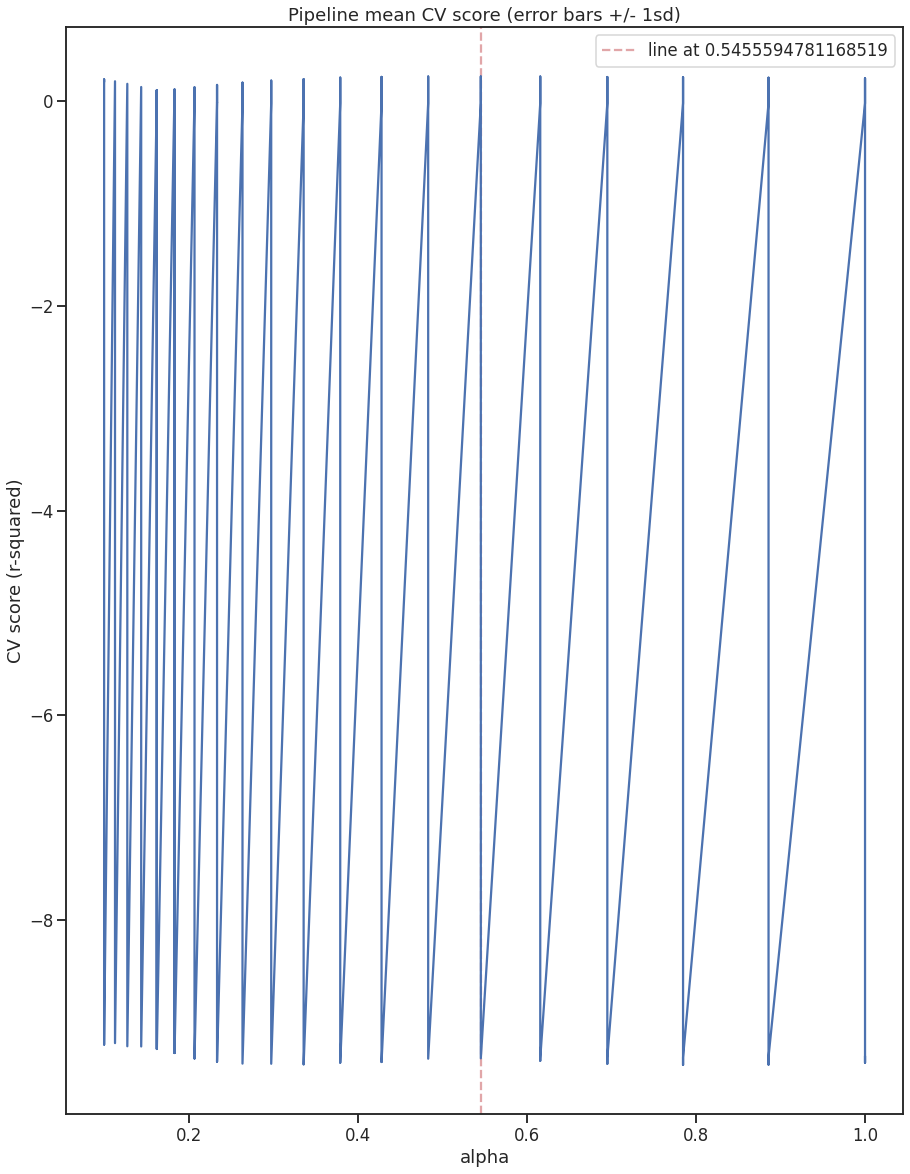

In [73]:
plt.figure(figsize=(15,20))
plt.errorbar(alpha_vals, lasso_mean_score, )
plt.axvline(x=alpha_best, c='r', ls='--', alpha=.5, label='line at {}'.format(alpha_best))
# plt.xticks(np.arange(0,1400, step=50))
plt.xlabel('alpha')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)')
plt.legend();

In [74]:
lasso_best = lasso_grid_4.best_estimator_

In [ ]:
# plot feature importances and retain top features

In [80]:
coef = lasso_best.named_steps.lasso.coef_
sparse_coef = lasso_best.named_steps.lasso.sparse_coef_
coef, sparse_coef

(array([0.46614445, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 <1x1311 sparse matrix of type '<class 'numpy.float64'>'
 	with 21 stored elements in Compressed Sparse Row format>)

In [93]:
coef_for_cols = pd.Series(coef, index=X.columns).sort_values(ascending=False)
coef_for_cols[:22]

HWA_MALE_ratio_2018                                            1.258800
HAA_MALE_ratio_2018_2019_diff                                  1.065105
AQI_2017_2018_diff                                             0.466144
NH_MALE_ratio_2017_2018_diff                                   0.431095
NHNAC_FEMALE_ratio_2018_2019_diff                              0.341731
BACH_TOT_2017_2018_pct_change                                  0.286908
BACH_TOT_2017_2019_pct_change                                  0.286851
Unemployed_2018_2019_pct_change                                0.261332
HIAC_FEMALE_2018_2019_diff                                     0.243238
Personal income (thousands of dollars) 2018_2019_pct_change    0.214707
Unemployment_rate_2018                                         0.210039
WAC_MALE_ratio_2018_2019_diff                                  0.190957
TOT_MALE_ratio_2017_2019_diff                                  0.164329
TOT_MALE_ratio_2017_2018_diff                                  0

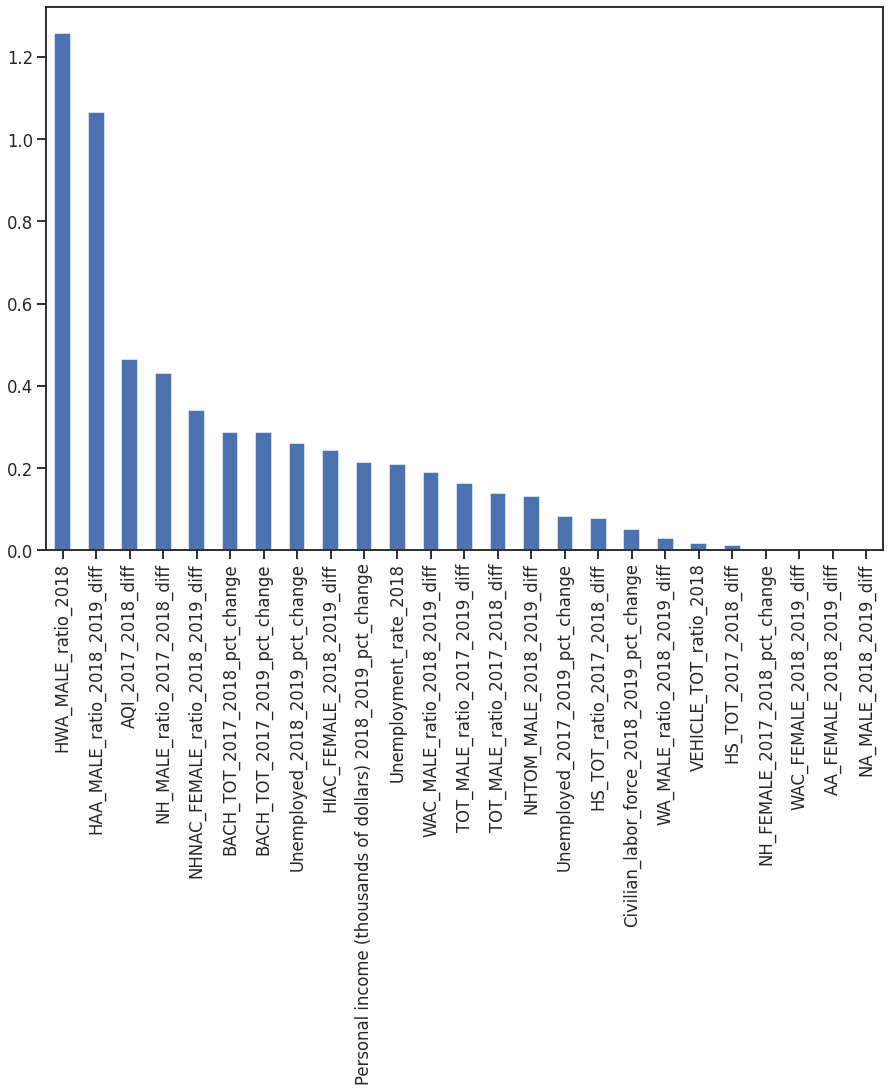

In [90]:
plt.figure(figsize=(15,10))
coef_for_cols[:25].plot(kind='bar')
plt.show()

In [ ]:
# looks like only 21 features are used in lasso as only 21 have a coefficient for this grid

In [99]:
best_cols = coef_for_cols[:21].index.tolist()
X_train_reduced_cols = X_train[best_cols]
X_test_reduced_cols = X_test[best_cols]
best_cols

['HWA_MALE_ratio_2018',
 'HAA_MALE_ratio_2018_2019_diff',
 'AQI_2017_2018_diff',
 'NH_MALE_ratio_2017_2018_diff',
 'NHNAC_FEMALE_ratio_2018_2019_diff',
 'BACH_TOT_2017_2018_pct_change',
 'BACH_TOT_2017_2019_pct_change',
 'Unemployed_2018_2019_pct_change',
 'HIAC_FEMALE_2018_2019_diff',
 'Personal income (thousands of dollars) 2018_2019_pct_change',
 'Unemployment_rate_2018',
 'WAC_MALE_ratio_2018_2019_diff',
 'TOT_MALE_ratio_2017_2019_diff',
 'TOT_MALE_ratio_2017_2018_diff',
 'NHTOM_MALE_2018_2019_diff',
 'Unemployed_2017_2019_pct_change',
 'HS_TOT_ratio_2017_2018_diff',
 'Civilian_labor_force_2018_2019_pct_change',
 'WA_MALE_ratio_2018_2019_diff',
 'VEHICLE_TOT_ratio_2018',
 'HS_TOT_2017_2018_diff']

In [100]:
reduced_param_grid = {
    'lasso__alpha': alpha,
    'lasso__copy_X': tf,
    'lasso__fit_intercept': tf,
    'lasso__normalize': tf,
    'lasso__positive': tf,
    'lasso__selection':['random','cyclic'],
    'lasso__warm_start': tf
}

In [102]:
lasso_reducd_grid = GridSearchCV(lasso_pipe, reduced_param_grid, cv=5, n_jobs=-1)
lasso_reducd_grid.fit(X_train_reduced_cols, y_train)
lasso_reducd_grid.best_score_, lasso_reducd_grid.best_params_

(0.36046339410605116,
 {'lasso__alpha': 0.20691380811147897,
  'lasso__copy_X': True,
  'lasso__fit_intercept': True,
  'lasso__normalize': False,
  'lasso__positive': True,
  'lasso__selection': 'cyclic',
  'lasso__warm_start': True})

In [103]:
# graph alpha
lasso_mean_score = lasso_reducd_grid.cv_results_['mean_test_score']
lasso_std_score = lasso_reducd_grid.cv_results_['std_test_score']
alpha_vals = [alph for alph in lasso_reducd_grid.cv_results_['param_lasso__alpha']]
alpha_best = lasso_reducd_grid.best_params_['lasso__alpha']

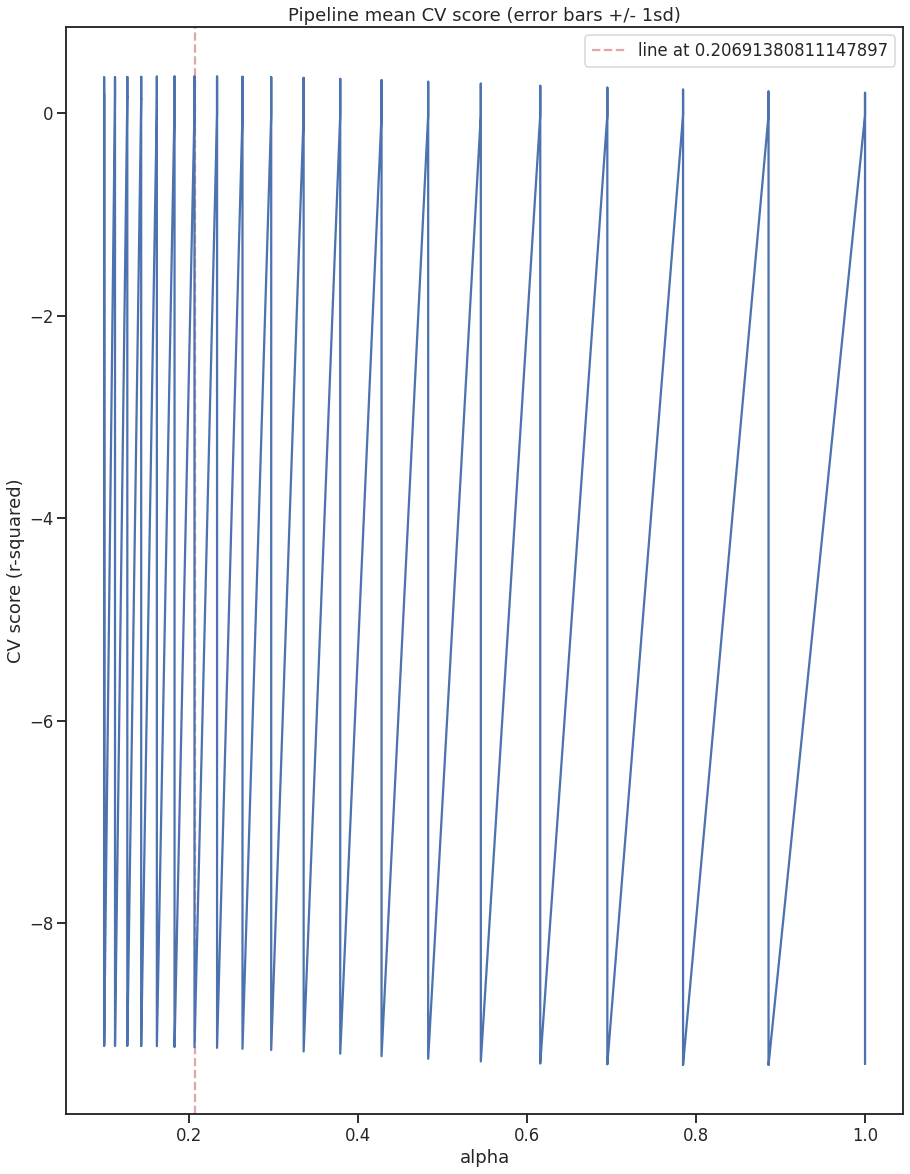

In [104]:
plt.figure(figsize=(15,20))
plt.errorbar(alpha_vals, lasso_mean_score )
plt.axvline(x=alpha_best, c='r', ls='--', alpha=.5, label='line at {}'.format(alpha_best))
# plt.xticks(np.arange(0,1400, step=50))
plt.xlabel('alpha')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)')
plt.legend();

In [106]:
lasso_reduced_best = lasso_reducd_grid.best_estimator_
lasso_reduced_best.score(X_test_reduced_cols, y_test)

0.2906281666233743

## overall eval

Makes sense that this model is overfitting; as we are just applying smaller and smaller alpha values. From look at the fluctations not surprised
as alpha fluctuates teh test score very dramatically. It appears that we should not go with lasso

In [117]:
# curious to see how far we can overfit
alpha = np.logspace(start=-3, stop=-1, num=20)

In [118]:
reduced_param_grid = {
    'lasso__alpha': alpha,
    'lasso__copy_X': tf,
    'lasso__fit_intercept': tf,
    'lasso__normalize': tf,
    'lasso__positive': tf,
    'lasso__selection':['random','cyclic'],
    'lasso__warm_start': tf
}

In [119]:
lasso_reducd_grid = GridSearchCV(lasso_pipe, reduced_param_grid, cv=5, n_jobs=-1)
lasso_reducd_grid.fit(X_train_reduced_cols, y_train)
lasso_reducd_grid.best_score_, lasso_reducd_grid.best_params_

(0.36039625679886067,
 {'lasso__alpha': 0.018329807108324356,
  'lasso__copy_X': True,
  'lasso__fit_intercept': True,
  'lasso__normalize': True,
  'lasso__positive': True,
  'lasso__selection': 'cyclic',
  'lasso__warm_start': True})

In [120]:
# graph alpha
lasso_mean_score = lasso_reducd_grid.cv_results_['mean_test_score']
lasso_std_score = lasso_reducd_grid.cv_results_['std_test_score']
alpha_vals = [alph for alph in lasso_reducd_grid.cv_results_['param_lasso__alpha']]
alpha_best = lasso_reducd_grid.best_params_['lasso__alpha']

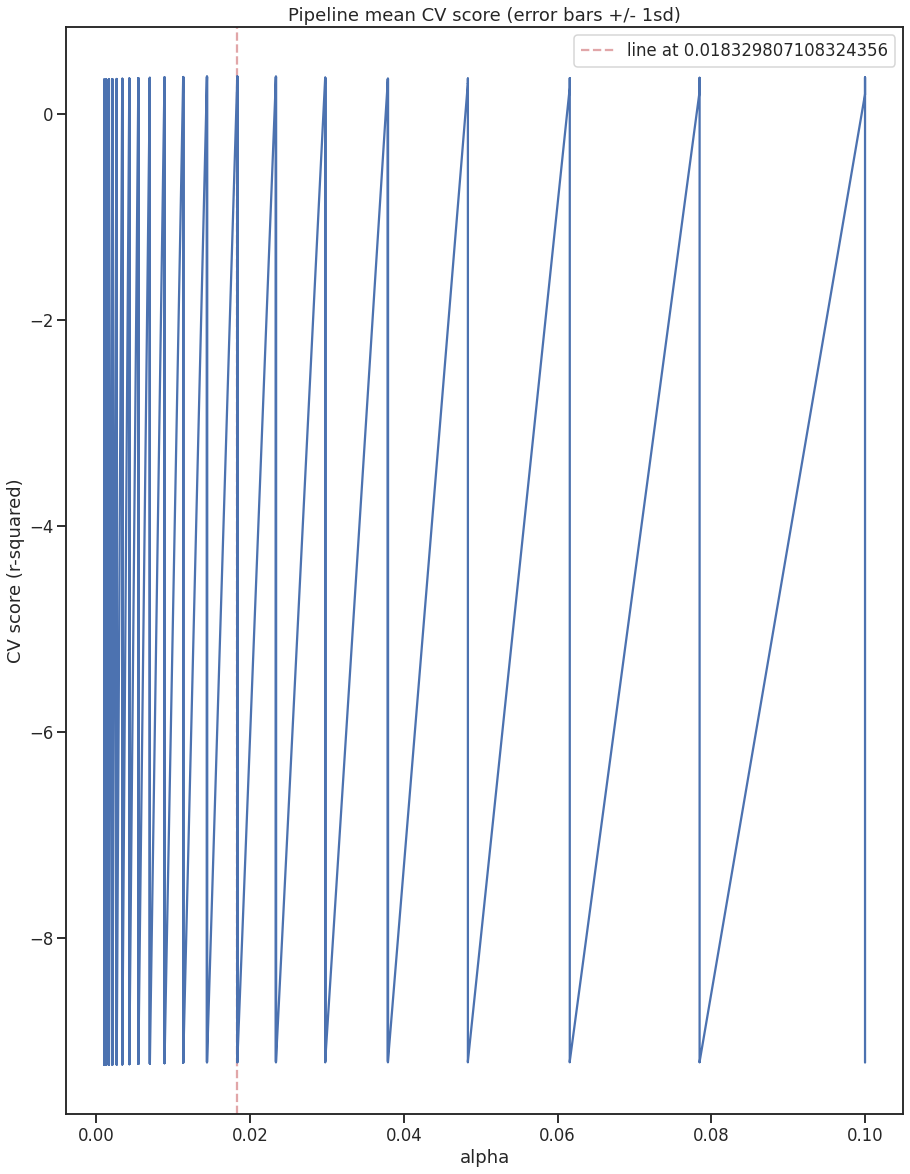

In [121]:
plt.figure(figsize=(15,20))
plt.errorbar(alpha_vals, lasso_mean_score )
plt.axvline(x=alpha_best, c='r', ls='--', alpha=.5, label='line at {}'.format(alpha_best))
# plt.xticks(np.arange(0,1400, step=50))
plt.xlabel('alpha')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)')
plt.legend();

seems the limit for overfitting alpah with this model .36
